In [1]:
# August 7 2017
# This file is for experiments with student2 4 skills and training trajectory length 6
# to check different architectures and whether they can learn good models
# This uses student2a where transitions happen after observations

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

def graph_trainauc_score(vloss, scores):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = scores
    title('Training Loss AUC versus Actual Performance')
    xlabel('Training Loss AUC')
    ylabel('Posttest Score')
    plot(xs,ys,'.')
    ylim(0,1)

def graph_trainauc_qval(vloss, qval):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = qval
    title('Training Loss AUC versus Own Qvalue')
    xlabel('Training Loss AUC')
    ylabel('Qvalue')
    plot(xs,ys,'.')

def graph_qval_score(qval, scores):
    figure()
    xs = qval
    ys = scores
    title('Own Qval versus Actual Performance')
    xlabel('Qvalue')
    ylabel('Posttest Score')
    plot(xs,ys,'.')

(10, 21)
last 2.44149599946e-08 threshold 1e-05


(0.0, 2e-05)

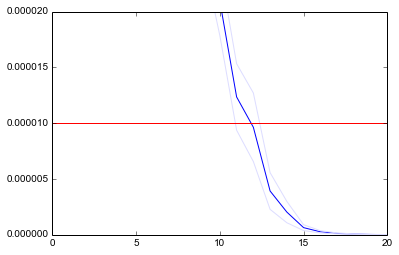

In [4]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelsimple_mid-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

#xlim(10, 15)
ylim(0.0000,0.00002)

# looks like epoch 12 is good for 0.00001

vloss shape (50, 13)
scores shape (50,)
[ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.25  1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    0.    1.    1.    1.    1.    1.    1.    1.  ]


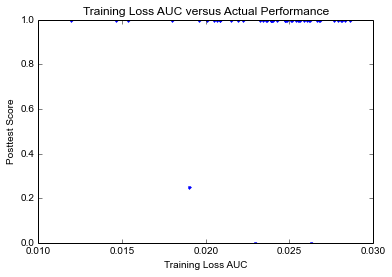

In [3]:
'''
Analyzing results of student2 with 4 skills, with training length 6 and testing length 6.
Single LSTM
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelsimple_mid-dropout10-shuffle1-data-test2a-n100000-l6-random.pickle/stats-runB.npz')
data12 = np.load('experiments/test2_modelsimple_mid-dropout10-shuffle1-data-test2a-n100000-l6-random.pickle/stats-runC.npz')
data21 = np.load('experiments/test2_modelsimple_mid-dropout10-shuffle1-data-test2a-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories10-real1-runB.npz')
data22 = np.load('experiments/test2_modelsimple_mid-dropout10-shuffle1-data-test2a-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories10-real1-runC.npz')

vloss = np.vstack((data11['vloss'],data12['vloss']))
scores = np.concatenate((data21['scores'][:,0],data22['scores'][:,0]))
qvals = np.concatenate((data21['qvals'][:,0],data22['qvals'][:,0]))

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss[:,-1])
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
#six.print_(qvals)

graph_trainauc_score(vloss, scores)

(10, 21)
last 2.22655664888e-09 threshold 1e-05


(0.0, 2e-05)

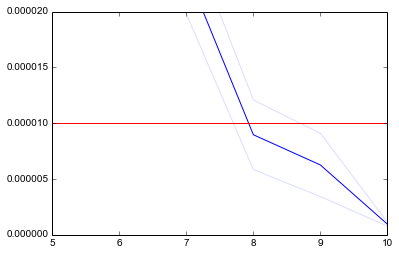

In [7]:
'''
Single GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelgrusimple_mid-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(5, 10)
ylim(0.0000,0.00002)

# looks like epoch 9 is good for 0.00001

vloss shape (50, 10)
scores shape (50,)
[ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.]


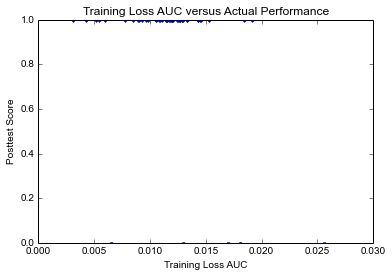

In [2]:
'''
Analyzing results of student2 with 4 skills, with training length 6 and testing length 6.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelgrusimple_mid-dropout10-shuffle1-data-test2a-n100000-l6-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_modelgrusimple_mid-dropout10-shuffle1-data-test2a-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories10-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss[:,-1])
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
#six.print_(qvals)

graph_trainauc_score(vloss, scores)